# Final Project
## Group 1: SJB

#### Introduction
For our project, we decided that the best neighborhood in Pittsburgh is the best neighborhood for recreation because of the health benefits, both physical and mental, of recreational activities. We analyzed data from different datasets provided by the Western Pennsylvania Regional Data Center to decide which neighborhood best fits this metric.

# Playgrounds in neighborhoods (near you!)
### By Jacob

**The best neighborhood for most recreational will be determined by the number of playgrounds in the neighborhood.**

![Southpark](https://media.giphy.com/media/l2Sq0RLawIPOecOxW/giphy.gif)

In [58]:
#importing necessary 
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline

In [59]:
#reading in csv
data = pd.read_csv("playgrounds.csv")

#### This is what we're working with. 

In [60]:
data.head() 
#displays the first 5 rows of the dataset. 
#Need to get the number of playgrounds in each neighborhood

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


##### *(internal thoughts)* I want to count the number of parks in each neighborhood. We look at name of park and the neighborhood its in. How do I perform this?

#### We'll only need to look at the "name" of the playground and the "neighborhood" name.

In [61]:
data.pivot(columns = "neighborhood", values = "name")

neighborhood,Allegheny Center,Allentown,Banksville,Bedford Dwellings,Beechview,Beltzhoover,Bloomfield,Bluff,Bon Air,Brighton Heights,...,Strip District,Swisshelm Park,Terrace Village,Troy Hill,Upper Hill,Upper Lawrenceville,West End,West Oakland,Westwood,Windgap
0,NaN,NaN,NaN,NaN,Able Long Playground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Alton Playground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Ammon Playground,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Duncan Park Playground,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,McKinley Upper Playground,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.pivot(columns = "neighborhood", values = "name").count()

neighborhood
Allegheny Center       4
Allentown              1
Banksville             1
Bedford Dwellings      1
Beechview              5
                      ..
Upper Lawrenceville    3
West End               1
West Oakland           1
Westwood               1
Windgap                1
Length: 68, dtype: int64

#### Sums the number of playgrounds each neighborhood has. 
### HOW?
#### The count method adds up each row of playground under each column of neighborhood.
#### Too many neighborhoods that only have one playground. Got to look at the top 30 neighborhoods. 

,playgrounds
neighborhood,
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Allegheny Center,4
Beltzhoover,4
Highland Park,4
Sheraden,4
Mount Washington,3
Elliott,3


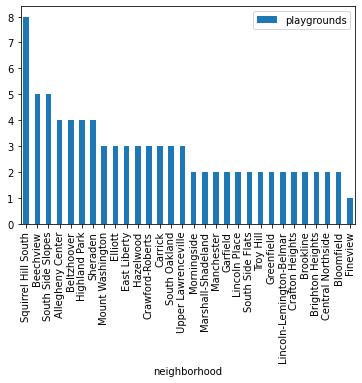

In [63]:
playground = data.pivot(columns = "neighborhood", values = "name").count().sort_values(ascending = False)
playground = playground.to_frame()
#i find out it wasn't a dataframe this whole time :O
playground.rename(columns= {0:'playgrounds'}, inplace= True)
playground.head(30).plot(kind='bar')
playground.head(30)

#### Winner Winner Squirrel Hill South has the most playgrounds...

This was expected to me just because my only knowledge of Pittsburgh is that Squirrel Hill is quite affluent. 
My personal favorite neighborhood is Squirrel Hill just because a good restaurant "NoodleHead" is there. 
After googlings turns out there are wealthier neighborhoods yet they lack in fun and recreation according to this bar graph.

### Maps are fun...we should look at one

##### Pittsburgh shapefile needed to create a map
##### then we merge our current dataframe with the shapefile

In [64]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
import matplotlib.pyplot as plt
playground_map = neighborhoods.merge(playground, how='left', left_on='hood', right_on='neighborhood')
playground_map[['hood','playgrounds','geometry']].head()

,hood,playgrounds,geometry
0,Point Breeze North,1.0,"POLYGON ((-79.90531 40.45549, -79.90488 40.455..."
1,Squirrel Hill North,1.0,"POLYGON ((-79.92063 40.44423, -79.92052 40.443..."
2,Garfield,2.0,"POLYGON ((-79.93546 40.47257, -79.93530 40.472..."
3,Bedford Dwellings,1.0,"POLYGON ((-79.96601 40.45520, -79.96595 40.454..."
4,Knoxville,NaN,"POLYGON ((-79.98819 40.41852, -79.98824 40.418..."


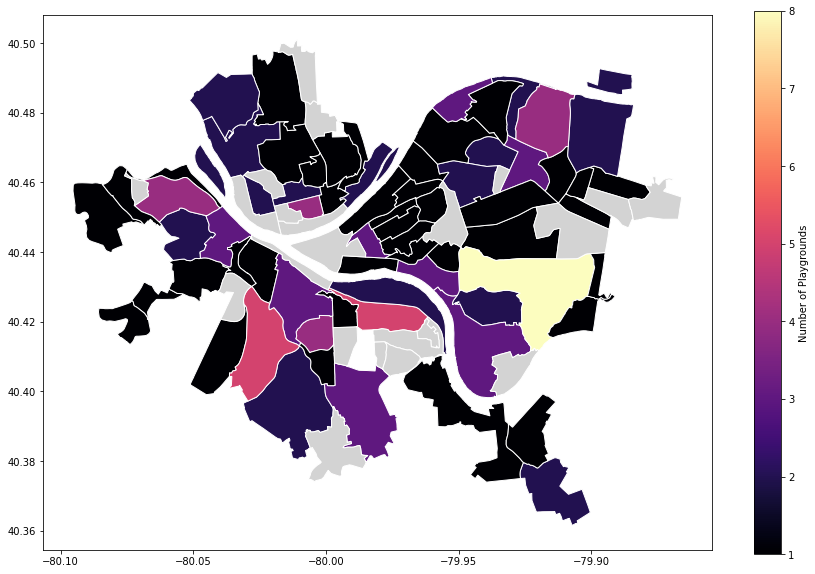

In [65]:
playground_map.plot(column='playgrounds',
                    figsize = (15,10),
                    cmap='magma',
                    edgecolor="white",
                    legend = True,
                    legend_kwds={'label': "Number of Playgrounds"},
                    missing_kwds={"color": "lightgrey"}
                   )

#### The top 4 are Squirrel hill south, Beechview, South side slopes, allegheny center. 
#### The winner by a 3 playground lead is squirrel hill south
#### But that could be because Squirrel hill south is the largest area neighborhood. 

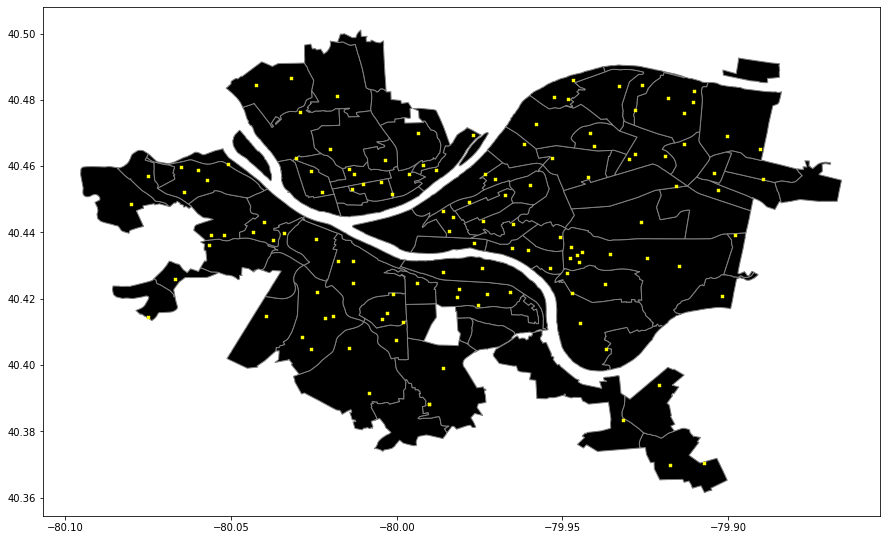

In [66]:
df_geo = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['longitude'], data['latitude']))
df = GeoDataFrame(data, geometry=df_geo['geometry'])
base = gpd.read_file('Neighborhoods/Neighborhoods_.shp')
df.plot(
                ax=base.plot(figsize=(15, 10),
                color='black',
                edgecolor='grey'),
                figsize=(20, 20),
                marker='X',
                color='yellow',
                markersize=8
        )


<img src="https://s3.amazonaws.com/visit-pittsburgh/CMS/2020-Neighborhood-Map2.jpg"  width="900" height="900">

##### The metric is flawed because Squirrel Hill has such a large area. It would be best to live in the location where the cluster of playgrounds are nearby. 
##### Based on the location of each playground Squirrel Hill has the most playgrounds next to each other. 

# Shashwat
This file processes the *CityParks.csv* file in order to use the data to help determine the best neighborhood in Pittsburgh for recreation
### Below is what the csv file looks like

In [ ]:
#imports pandas
import pandas as pd

In [3]:
#imports csv file and prints
park = pd.read_csv("CityParks.csv", index_col = "_id")
park

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1460363095,Woods Run Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.476383,-80.029253
206,930068146,Young Field Park,Park,Parks - Northern,NaN,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.472963,-80.032768
207,1127012019,Zulema Park,Park,Parks - Schenley,NaN,Central Oakland,3,4,42003040500,3,4,4,2-14,40.435693,-79.957048


### Clean-up
We first need to make this data set more concise so that we are able to count up the amounts of parks in each neighborhood. We can start off by removing all rows that represent a data point other than parks. This can be accomplished with the drop function. This will keep the dataset specific to parks.

In [4]:
#Elimnates all instances of datapoints where the type is not a park
park = park.drop(park[park['type'] == "Traffic Island/Median"].index)
park = park.drop(park[park['type'] == "Building Grounds"].index)
park = park.drop(park[park['type'] == "Monument/Memorial"].index)
park = park.drop(park[park['type'] == "Open Space"].index)

Now to count up the numbers we need a numeric value assigned for each instance of a park in the data set. As seen in the dataset, there is not really an option to do that, however the *type* column lists the same string of Park everytime in the dataset. Due to this consistency, what we can do is replace all instance of Park with the integer 1. We also have t make sure that we change the column type to *int* or else we will not be able to compute anything with the values.

In [5]:
#Replaces the park value to 1 so that it can be used in a sum
park = park.replace(to_replace = "Park", value = 1)
#converts the columns to integer type so that .sum() can be used
park["type"] = pd.to_numeric(park["type"])

### Grouping by park count
Now we can make use of the pandas in-built *groupby* & *sum* functions to add up the counts of the parks in each of the different neighborhoods. Lets print the values in ascending order just to get an idea of the top few neighborhoods with the most parks.

In [8]:
park_counts = park.groupby("neighborhood").sum()['type'].sort_values(ascending = False)
park_counts.head(15)

neighborhood
South Side Slopes        6
Beechview                6
Mount Washington         5
Hazelwood                5
Troy Hill                5
Marshall-Shadeland       4
Elliott                  4
East Liberty             4
Sheraden                 4
Lower Lawrenceville      3
Manchester               3
Spring Hill-City View    3
Crawford-Roberts         3
Squirrel Hill South      3
Garfield                 3
Name: type, dtype: int64

### Data-Visualization
This code practically gets all the information from the dataset that we will be looking at to assess the best neighborhhod in Pittsburgh in terms of recreation. Now we need to use the correct visual representation to represent the data in a way that is useful to our final conclusion. Lets try a bar graph to see how the different neighborhoods stack up against each other.

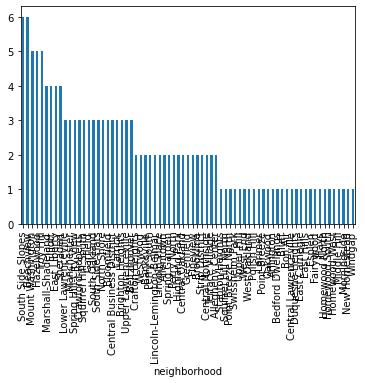

In [9]:
park_counts.plot(kind = "bar")

### Cloropleth Map
Obviously choosing a bar graph was a mistake, with all the different data points the labels keep overlapping. Instead let us utilize geopandas to create a *cloropleth map*, this will be especially useful since we only have one variable to plot. It may also give use some information about how neighborhoods with more recreation affect the surrounding neighborhoods. To start off lets read a shp file to get the general map of the different neighborhoods in Pittsburgh. This wil create a new geopandas dataframe under the name *neighborhoods*

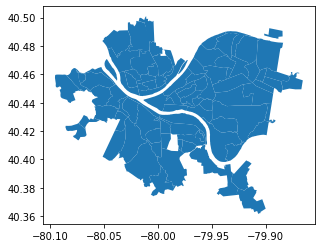

In [10]:
#Import the neccesary libraries
import geopandas as gpd
%matplotlib inline

#Reads shp file and plots the general map
neighborhoods = gpd.read_file("Neighborhood/Neighborhoods_.shp")
neighborhoods.plot()

### DF Merge
Next we need to merge the geopandas and our own dataframe so we can plot the corresponding data regarding park counts with the geometrical information stored insides the geopandas dataframe. We will include the *how='left'* statement so that if any of the neighborhoods did not include data in the dataset about parks, they will be labeled as *Nan*. Lets print out the hood and type column in the new merged *park_counts* dataframe to ensure the merge was succesful.

In [11]:
parks_map = neighborhoods.merge(park_counts,how='left',left_on='hood',right_on='neighborhood')
parks_map[['hood', 'type']]


,hood,type
0,Central Oakland,2.0
1,North Oakland,NaN
2,West Oakland,1.0
3,Crawford-Roberts,3.0
4,Strip District,2.0
...,...,...
85,Ridgemont,NaN
86,West End,1.0
87,California-Kirkbride,NaN
88,Glen Hazel,NaN


### Plot Time!!!
So we completed all the steps, so lets make the cloropleth map and use the in-built pandas style functions to make it look aesthetic and more easily readable to everyone. The grey color neighborhoods are all of the neighborhoods that did not contain park data in the data set.

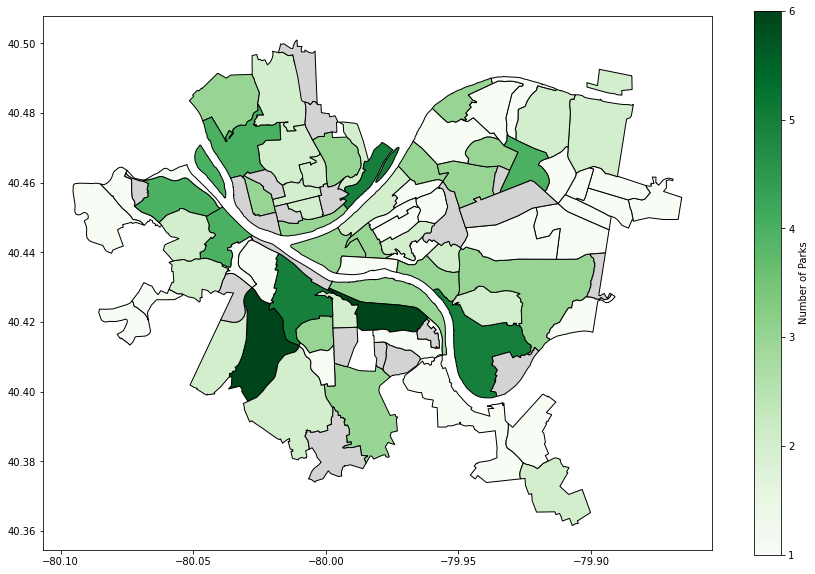

In [19]:
parks_map.plot(column = 'type',
              cmap = 'Greens',
              edgecolor = 'black',
              legend = True,
              legend_kwds = {'label' : "Number of Parks"},
              figsize = (15,10),
              missing_kwds = {"color" : "lightgrey"}
              )

#### This concludes the analysis of the number of parks in each neighborhood in Pittsburgh. This analysis will better help us determine the bets neighborhood in Pittaburgh for recreation.

# Courts and Rinks by Neighborhood
### By Ben Osband

### Introduction

For my submetric, I decided to look at courts and rinks in each neighborhood to decide which is the best for recreation. To do this, I used a dataset of courts and rinks from the Western Pennsylvania Regional Data Center

First, let's import all the packages we'll need and set the theme for plotting.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

%matplotlib inline

plt.style.use('ggplot')

Then, let's read in the data about courts and rinks and the shapefile for Pittsburgh neighborhoods.

In [2]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227")
neighborhoods = gpd.read_file('Neighborhoods/Neighborhoods_.shp')

Now that we have all our data, let's take a look at it and see how we can determine which neighborhood is the best for recreation based on its courts and rinks

In [3]:
data.head()

,_id,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305


We can see that each row contains data about a particular park, including the neighborhood it belongs to, so first let's simply determine which neighborhood has the greatest number of courts and rinks.

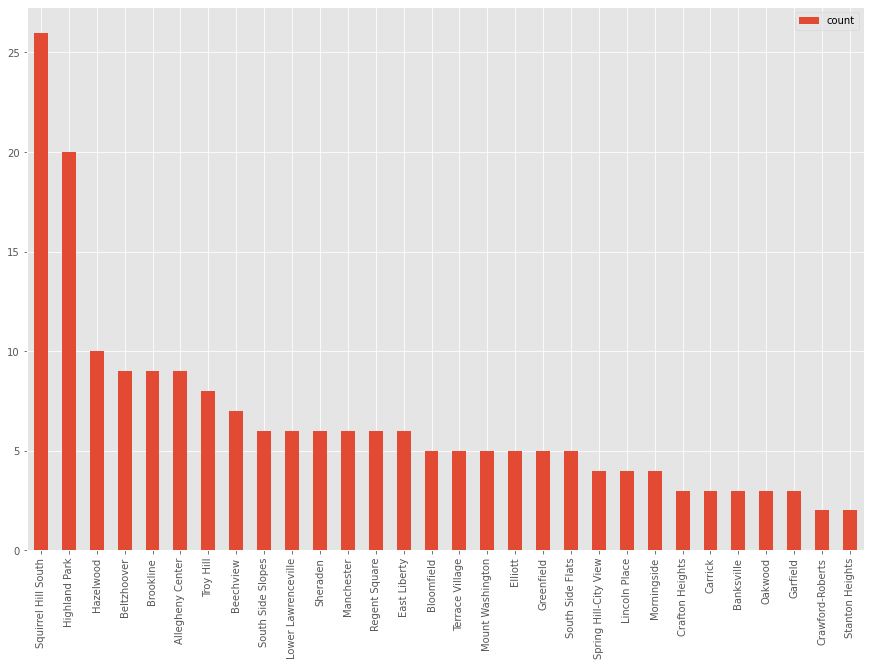

In [5]:
# Gets number of courts and rinks per neighborhood, converts it to a dataframe, and renames the neighborhood column to count
count_by_hood = data['neighborhood'].value_counts().to_frame()
count_by_hood.rename(columns={'neighborhood':'count'}, inplace=True)

count_by_hood.iloc[:30].plot(kind='bar', figsize=(15, 10))

plt.show()

From plotting the top 30 neighborhoods, we can see that Squirrel Hill South, Highland Park, and Hazelwood have the top 3 greatest number of courts and rinks in Pittsburgh. This can also be seen visually below.

<Figure size 432x288 with 0 Axes>

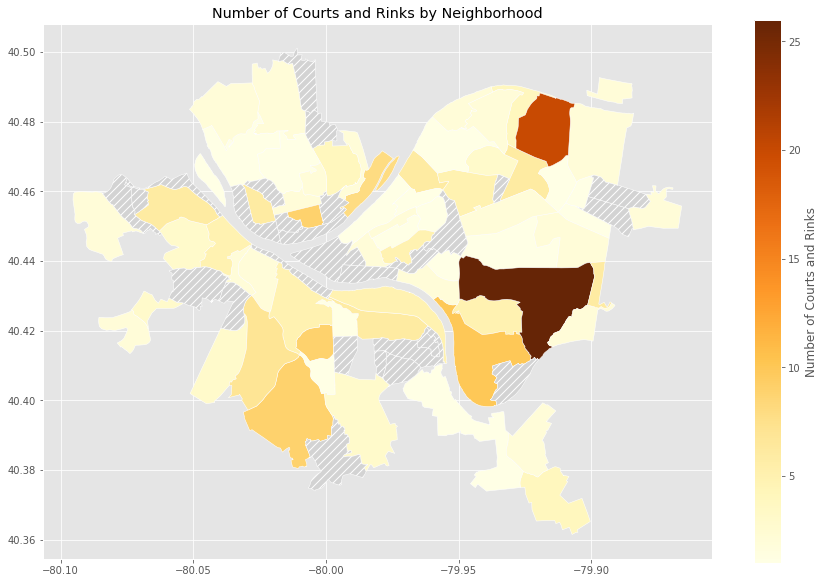

In [21]:
# Merges the counts per neighborhood 
quantity_map = neighborhoods.merge(count_by_hood, how='left', left_on='hood', right_on=count_by_hood.index)

plt.figure(1)

quantity_map.plot(
             column='count',
             cmap='YlOrBr',
             edgecolor='white',
             legend=True,
             figsize=(15, 10),
             legend_kwds={'label': 'Number of Courts and Rinks'},
             missing_kwds={'color': 'lightgrey', 'hatch': '///'})

plt.title('Number of Courts and Rinks by Neighborhood')
plt.show()

Great, we know what neighborhoods have the most courts and rinks! However, there are a couple additional factors to consider.

First, some neighborhoods are significantly larger than others, which likely impacts the number of courts and rinks in any given neighborhood. For example, Highland Park only has 6 less courts and rinks than Squirrel Hill South, but from the map above we can see that Highland Park is considerably smaller in terms of area.

The actual locations of the courts and rinks are plotted below to give you an idea of the true distribution.

<Figure size 432x288 with 0 Axes>

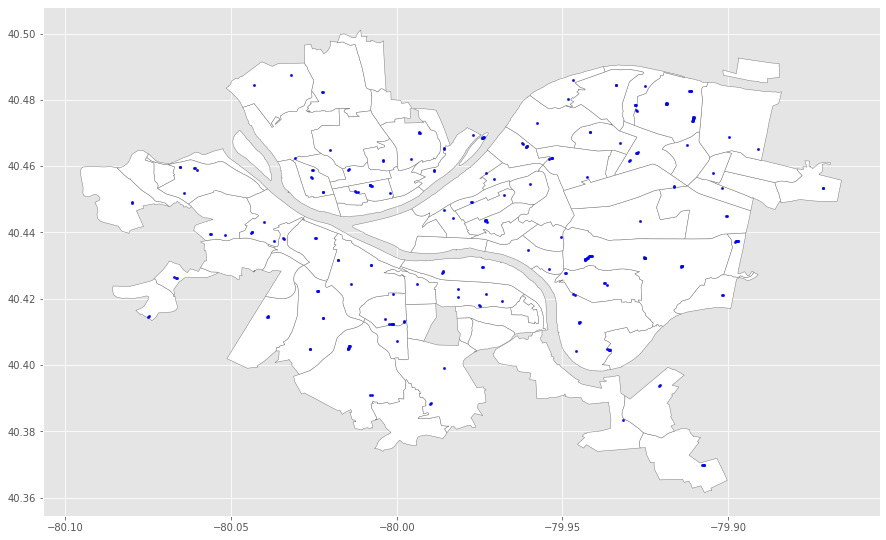

In [22]:
# Creates a point for each latitude and longitude and then creates a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)

# Changes to plot 2
plt.figure(2)

# Plots the base map and then plots the dots on top of it
base = gpd.read_file('Neighborhoods/Neighborhoods_.shp')
gdf.plot(
    ax=base.plot(figsize=(15, 10),
    color='white',
    edgecolor='grey'),
    figsize=(15, 10),
    marker='o',
    color='blue',
    markersize=5)

# Ensures the plot is shown here and not above
plt.show()


As you can see, the courts and rinks are not necessarily concentrated in the neighborhoods with the most of them. To account for this, we will consider the _density_ of courts and rinks in each neighborhood.

Text(0.5, 0, 'Neighborhood')

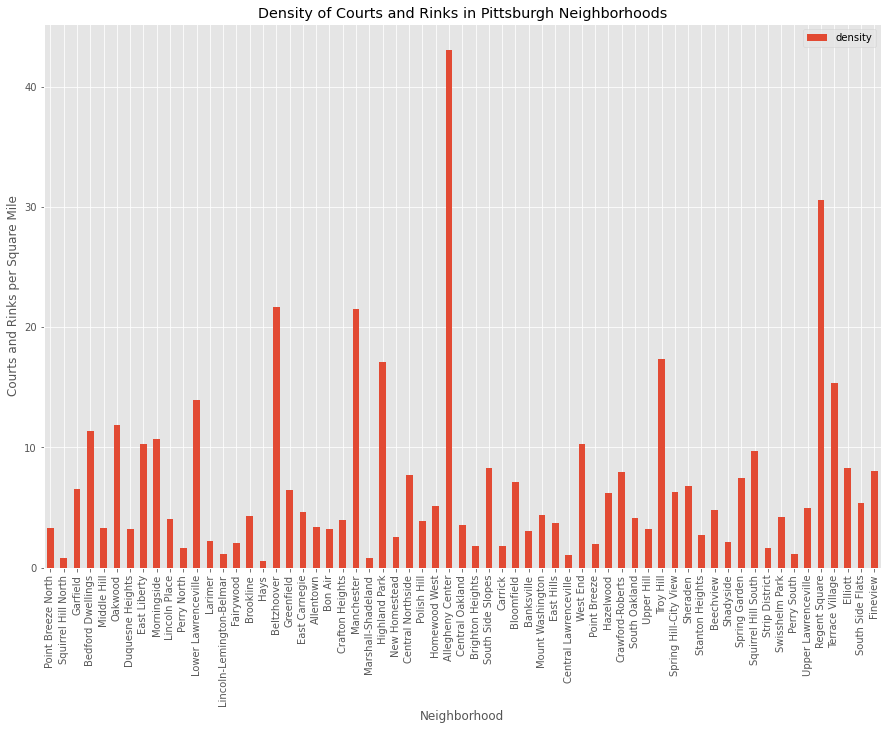

In [23]:
# Combines the neighborhoods and their respective square mileage into a dataframe
density_data = pd.concat([neighborhoods['hood'], neighborhoods['sqmiles']], axis=1)

# Sets the index to be the neighborhood
density_data.set_index('hood', inplace=True)

# Merges the number of courts and rinks by neighborhood to the square mileage by neighborhood
density_data = density_data.merge(count_by_hood, how='left', left_on=density_data.index, right_on=count_by_hood.index)

# Renames the key_0 column to neighborhood and then sets that to be the index again
density_data.rename(columns={'key_0': 'neighborhood'}, inplace=True)
density_data.set_index('neighborhood', inplace=True)

# Removes null values to account for neighborhoods with no courts or rinks
density_data = density_data[density_data[['sqmiles', 'count']].notnull().all(1)]

# Creates a list to store density values in
densities = []

# Iterates through each row in the data
for index, row in density_data.iterrows():
    
    # Divides the number of courts and rinks in each neighborhood by the square mileage
    # of that neighborhood to get the number of courts and rinks per square mile
    count = row[1]
    area = row[0]
    density = count / area
    densities.append(density)

# Creates a new column for densities
density_data['density'] = densities

# Creates bar chart and adds labels
density_data.plot(kind='bar', y='density', figsize=(15, 10))
plt.title('Density of Courts and Rinks in Pittsburgh Neighborhoods')
plt.ylabel('Courts and Rinks per Square Mile')
plt.xlabel('Neighborhood')


This bar chart is the density of courts and rinks in each neighborhood by courts and rinks per square mile. In it's current form, though, it's cluttered and not very helpful, so let's sort it and filter it down to neighborhood's with a density of more than 7 courts and rinks per square mile.

Text(0.5, 0, 'Neighborhood')

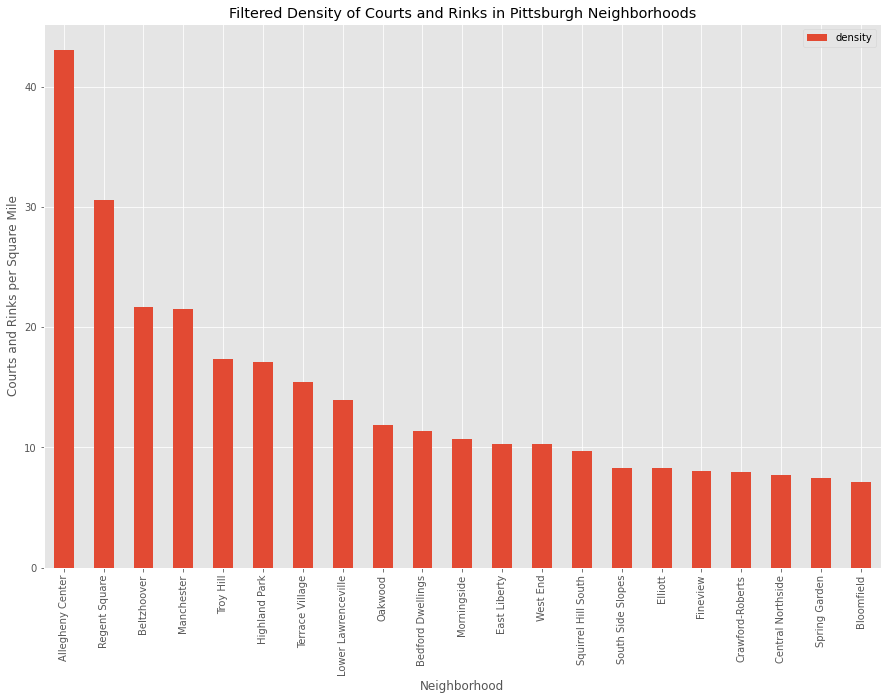

In [24]:
# Creates filter mask
density_mask = density_data['density'] >= 7

# Filters the data into a new dataframe using the mask
filtered_density_data = density_data[density_mask]

filtered_density_data = filtered_density_data.sort_values('density', ascending=False)

# Plots the newly filtered data and adds labels
filtered_density_data.plot(kind='bar', y='density', figsize=(15, 10))
plt.title('Filtered Density of Courts and Rinks in Pittsburgh Neighborhoods')
plt.ylabel('Courts and Rinks per Square Mile')
plt.xlabel('Neighborhood')


As you can see, the neighborhoods with the greatest densities of courts and rinks are Allegheny Center, Regent Square, Beltzhoover, and Manchester. These results differ greatly from the initial approach of the neighborhood with the greatest number of courts and rinks, and provides a more accurate depiction of the accessibility of these courts and rinks.

Let's look at this visually.

<Figure size 432x288 with 0 Axes>

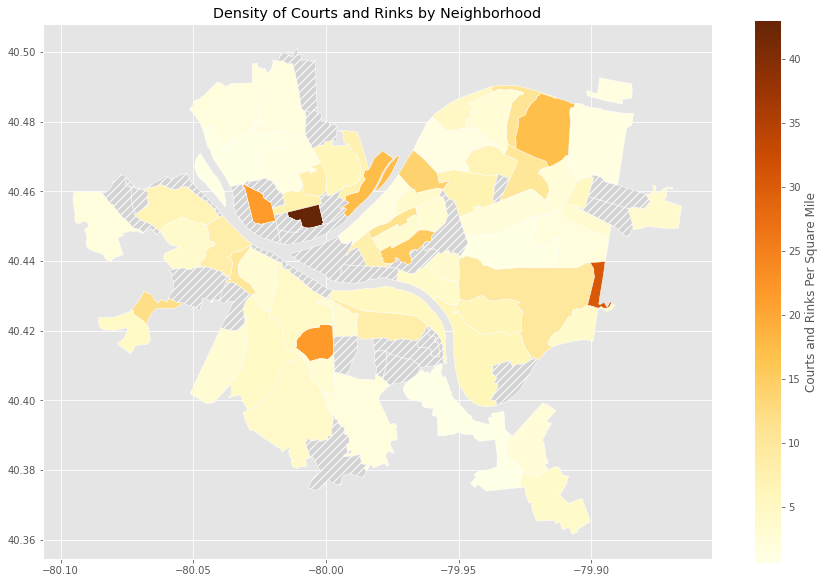

In [25]:
# Merges density data with map data
density_map = neighborhoods.merge(density_data, how='left', left_on='hood', right_on=density_data.index)

plt.figure(3)

# Plots the map
density_map.plot(
             column='density',
             cmap='YlOrBr',
             edgecolor='white',
             legend=True,
             figsize=(15, 10),
             legend_kwds={'label': 'Courts and Rinks Per Square Mile'},
             missing_kwds={'color': 'lightgrey', 'hatch': '///'})

plt.title('Density of Courts and Rinks by Neighborhood')

plt.show()

Highland Park and Beltzhoover both appear high in the rankings of both quantity and density, and Squirrel Hill South has the greatest number of courts and rinks, so as of now we will consider Highland Park, Beltzhoover, and Squirrel Hill South the contenders for best neighborhood.

There is something to be said about considering a a middle ground between density and quantity of courts and rinks, and this brings us to the other important factor. That is, if a neighborhood is very small but has a few courts and rinks, it's density will be relatively high, but we have to keep in mind that there are different types of courts and rinks.

Below you can see the various types of courts

In [26]:
types = data['type'].unique().tolist()
print(types)

['Basketball (Full)', 'Tennis', 'Basketball (Half)', 'General Sports', 'Street Hockey', 'Dek Hockey', 'Hockey', 'Pickleball', 'Volleyball', 'Lawn Bowling', 'Bocce', 'Horseshoe Pit']


Thus, we will consider the _variety_ of courts and rinks in each neighborhood.

Below is a bar chart of the number of types of courts and rinks in each neighborhood with neighborhoods with only 1 type filtered out.

Text(0.5, 0, 'Neighborhood')

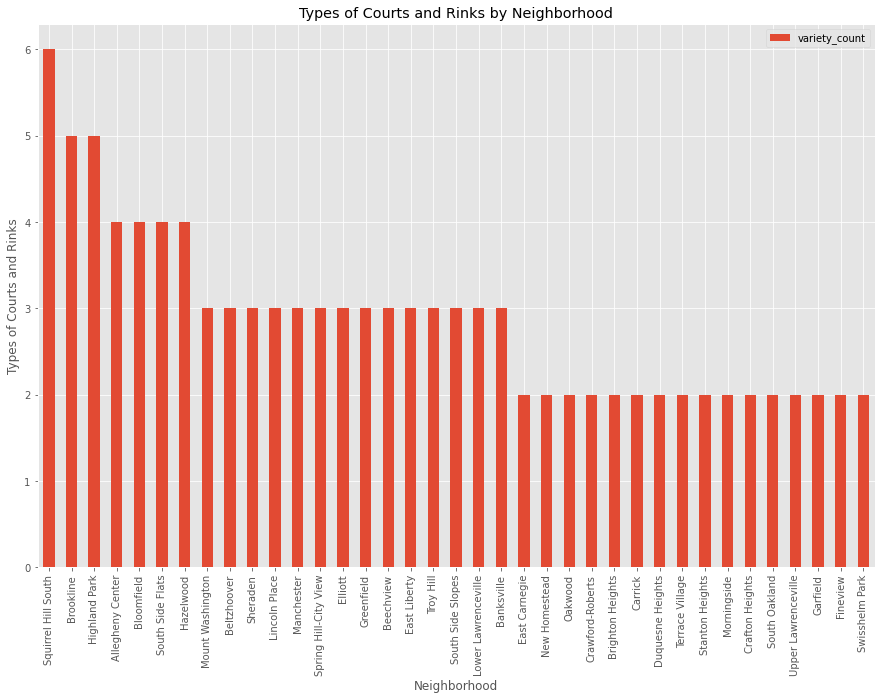

In [27]:
# Creates a dictinoary to store a list of the types of courts and rinks in each neighborhood
variety_dict = {}

# Iterates through each court and rink from the original dataset
for index, row in data.iterrows():
    
    # Gets the neighborhood and type of facility
    nhood = row[9]
    rec_type = row[3]
    
    # if the neighborhood doesn't have any entries yet, creates a new list
    if nhood not in variety_dict:
        variety_dict[nhood] = [[rec_type]]
    # otherwise, if the type of facility is not already in the list, adds it to the list
    elif rec_type not in variety_dict[nhood][0]:
        variety_dict[nhood][0].append(rec_type)


# Transforms into usable dataframe
variety_data = pd.DataFrame.from_dict(variety_dict)
variety_data = variety_data.transpose()
variety_data.rename(columns={0: 'types'}, inplace=True)

# List to store counts
counts = []

# Iterates through each neighborhood in the new dataframe
for index, row in variety_data.iterrows():
    
    # adds the number of types of facilities to the counts list
    counts.append(len(row[0]))

# Adds column for the number of types of facilities for each neighborhood
variety_data['variety_count'] = counts

filtered_variety_data = variety_data[variety_data['variety_count'] > 1]
filtered_variety_data = filtered_variety_data.sort_values('variety_count', ascending=False)

# Plots data
filtered_variety_data.plot(kind='bar', y='variety_count', figsize=(15, 10))
plt.title('Types of Courts and Rinks by Neighborhood')
plt.ylabel('Types of Courts and Rinks')
plt.xlabel('Neighborhood')

As you can see, Squirrel Hill South, Brookline, and Highland Park have the top 3 greatest varieties of courts and rinks.

Let's look at a map of this data.

<Figure size 432x288 with 0 Axes>

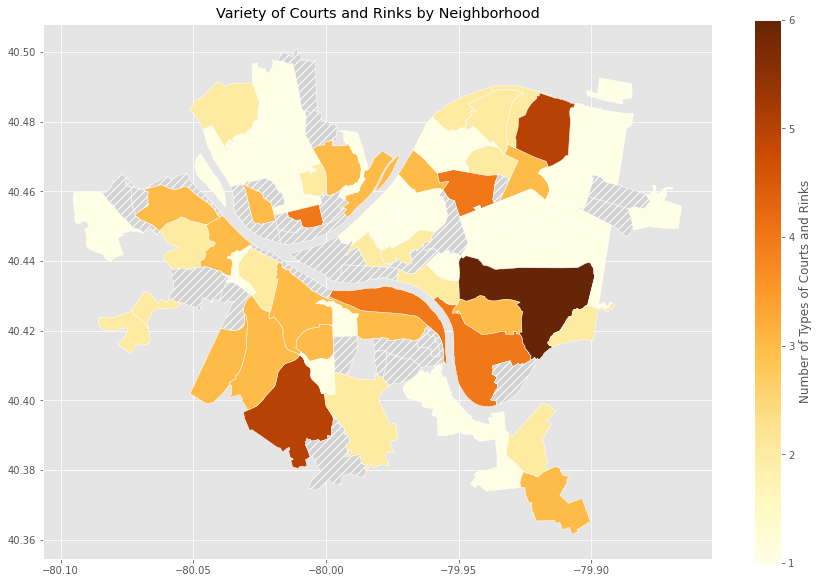

In [28]:
variety_map = neighborhoods.merge(variety_data, how='left', left_on='hood', right_on=variety_data.index)


plt.figure(4)

variety_map.plot(
             column='variety_count',
             cmap='YlOrBr',
             edgecolor='white',
             legend=True,
             figsize=(15, 10),
             legend_kwds={'label': 'Number of Types of Courts and Rinks'},
             missing_kwds={'color': 'lightgrey', 'hatch': '///'})

plt.title('Variety of Courts and Rinks by Neighborhood')

plt.show()

Looking at how neighborhoods appear across different measures, we can see that Beltzhoover and Allegheny Center have good density but not enough variety, which leaves us with Squirrel Hill South and Highland Park as our contenders for best neighborhood. Squirrel Hill South has the greatest number of courts and rinks and has the most variety, but Highland Park is a close runner-up in both of those categories and has greater density than Squirrel Hill South. This lack of density in Squirrel Hill South may make it more inconvenient to get from one facility to another, especially for someone without a personal vehicle.

To quantify this, let's rank the neighborhoods by each metric and combine them.

First is the count ranking

In [40]:
rankings = [i + 1 for i in range(len(count_by_hood))]

rankings = pd.Series(rankings)
hoods = pd.Series(count_by_hood.index)

count_rankings = pd.concat([hoods, rankings], axis=1)

count_rankings.rename(columns={0: 'Neighborhood', 1: 'Count Ranking'}, inplace=True)
count_rankings.set_index('Neighborhood', inplace=True)

count_rankings

,Count Ranking
Neighborhood,
Squirrel Hill South,1
Highland Park,2
Hazelwood,3
Beltzhoover,4
Brookline,5
...,...
Marshall-Shadeland,59
Central Lawrenceville,60
Hays,61


Then the density rankings

In [34]:
rankings = [i + 1 for i in range(len(density_data))]

rankings = pd.Series(rankings)
hoods = pd.Series(density_data.sort_values('density', ascending=False).index)

density_rankings = pd.concat([hoods, rankings], axis=1)

density_rankings.rename(columns={'neighborhood': 'Neighborhood', 0: 'Density Ranking'}, inplace=True)
density_rankings.set_index('Neighborhood', inplace=True)

density_rankings

,Density Ranking
Neighborhood,
Allegheny Center,1
Regent Square,2
Beltzhoover,3
Manchester,4
Troy Hill,5
...,...
Lincoln-Lemington-Belmar,59
Central Lawrenceville,60
Squirrel Hill North,61


Last, the variety rankings

In [39]:
rankings = [i + 1 for i in range(len(variety_data))]

rankings = pd.Series(rankings)
hoods = pd.Series(variety_data.sort_values('variety_count', ascending=False).index)

variety_rankings = pd.concat([hoods, rankings], axis=1)

variety_rankings.rename(columns={0: 'Neighborhood', 1: 'Variety Ranking'}, inplace=True)
variety_rankings.set_index('Neighborhood', inplace=True)
variety_rankings

,Variety Ranking
Neighborhood,
Squirrel Hill South,1
Highland Park,2
Brookline,3
Allegheny Center,4
Bloomfield,5
...,...
Fairywood,59
Perry South,60
Allentown,61


Now, let's merge them and add a column for total rankings

In [61]:
final_rankings = count_rankings.merge(density_rankings, how='left', left_on=count_rankings.index, right_on=density_rankings.index)

final_rankings.rename(columns={'key_0': 'Neighborhood'}, inplace=True)
final_rankings.set_index('Neighborhood', inplace=True)

final_rankings = final_rankings.merge(variety_rankings, how='left', left_on=final_rankings.index, right_on=variety_rankings.index)
final_rankings.rename(columns={'key_0': 'Neighborhood'}, inplace=True)
final_rankings.set_index('Neighborhood', inplace=True)

ranks = []

for row in final_rankings.iterrows():
    rank = row[1][0] + row[1][1] + row[1][2]
    ranks.append(rank)
    
final_rankings['Rank'] = ranks

final_rankings.sort_values('Rank', ascending=True, inplace=True)

final_rankings

,Count Ranking,Density Ranking,Variety Ranking,Rank
Neighborhood,,,,
Highland Park,2,6,2,10
Allegheny Center,6,1,4,11
Beltzhoover,4,3,8,15
Squirrel Hill South,1,14,1,16
Manchester,12,4,11,27
...,...,...,...,...
Strip District,57,57,52,166
Marshall-Shadeland,59,62,48,169
Central Lawrenceville,60,60,49,169


The neighborhood that appears highest in each category will have the lowest ranking in that category, so the neighborhood with the lowest overall ranking is the best overall neighborhood.

As we can see, Highland Park has the least value, making it the best neighborhood in Pittsburgh by this metric.

**Ben's reflection**:

Due to Squirrel Hill South showing up high in the rankings for both courts and rinks and playgrounds, I believe it is the best neighborhood overall. I've never been to Squirrel Hill South, so I can't say wheter or not I expected it to be the best neighborhood for recreation. My personal favorite neighborhood is East Liberty because it's easy to get there and there are plenty of things to do, but I will definitely check out Squirrel Hill South in the future.

**Jacob's reflection**:

The best neighborhood for most recreational will be determined by the number of playgrounds in the neighborhood is a flawed metric. Squirrel Hill has such a large area so it would make sense that it should have more playgrounds. Taking that in account, it would be best for the resident to live in the location where the cluster of playgrounds are nearby. After looking at the data from different angles, Squirrel Hill south still is my pick because it has the most playgrounds so close to one general area, plus Ben's data frequently showed Squirrel Hill.

Squirrel Hill was my personal favorite because my dad took me to a good restaurant there, "NoodleHead." I've been around there more than other neighborhoods of Pittsburgh.

**Shash's reflection**:

Using the metric of number of parks to determine the neighborhood that is best in recreation is inherently flawed. For one looking at the cloropleth map, we could see the neighborhoods with only oner or two parks were on average much smaller than the neighborhoods with more parks. This itself brings up the factor of density which could play a big role on whether a neighborhood is actually the best for recreation for not. However if we were to follwo the metric than the best ngihborhoods would have to be South Side Slopes and Beechview,. I personally have never been to either of these neighborhoods so I cannot say if I expected them to be the best neighborhood for recreation or not. My personal favorite neighborhood is South Side Flats because there are a bunch of cool stores there.